# Regression

### 0 - Setup

###### Import pckgs

In [66]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *

###### Import data

In [67]:
dtf = pd.read_csv("train-xy.csv")
dtf.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,-2.836799,-0.358848,0.229182,0.699971,1.336190,0.984788,-0.425239,1.310004,0.215709,-1.389411,...,0.281741,-0.922837,1.053928,-1.051535,-0.056903,0.083066,0.192312,-0.039506,-0.806675,0.047861
1,-6.691350,1.081602,-0.455832,0.492078,1.408173,-0.197963,1.617531,-0.950866,-1.250921,-0.303370,...,2.570875,-1.028607,0.679621,-1.361717,0.144300,1.453990,-0.298901,-1.717027,-0.518633,-0.593781
2,2.211965,-0.959496,-0.430918,0.191239,-0.910758,-0.699870,-1.683374,0.719717,0.534322,0.669822,...,0.055120,-0.344222,0.092876,-0.513097,1.317656,0.138951,-1.900100,1.496698,-0.108403,0.823793
3,-3.404807,0.611808,0.186991,0.490763,0.488140,-0.847026,1.205372,1.462078,-1.410871,-1.152401,...,-0.036887,0.573940,1.462439,-2.483321,-0.173088,0.900508,0.441478,0.461693,0.791968,-0.225677
4,-8.606178,0.716633,-1.377330,-2.589308,0.444174,2.859679,-0.476884,0.558184,-0.476010,-1.181636,...,-1.734769,-0.556033,-1.528430,0.126828,2.164732,0.209919,-0.324924,-0.864985,-0.494360,-1.019706


Shape: (1000, 100)
-----------------
Y --> Type:num | Nas: 0(0%) | Min-Max: (-28)-(24) | Possible PK
X1 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X2 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3) | Possible PK
X3 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X4 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X5 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X6 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3) | Possible PK
X7 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X8 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X9 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3) | Possible PK
X10 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3) | Possible PK
X11 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X12 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3) | Possible PK
X13 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X14 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X15 --> Type

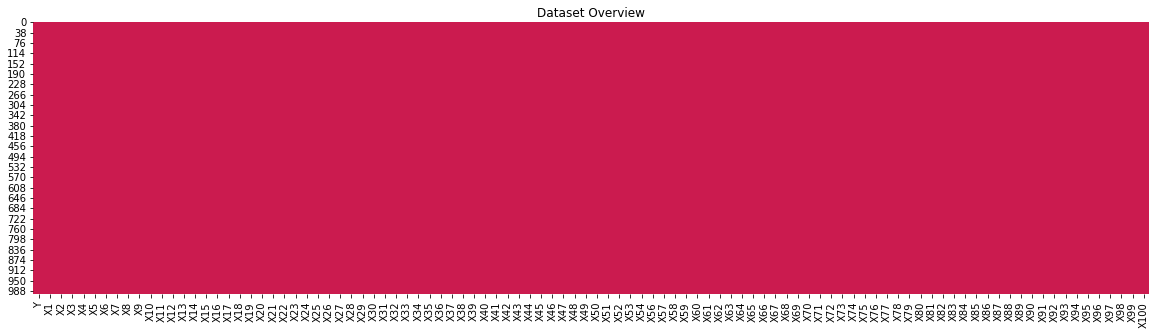

 Categerocial   Numerical   NaN 


In [68]:
dtf = dtf.drop(columns='X55')
dtf_overview(dtf, max_cat=20, figsize=(20,5))

### 1 - Data Analysis

###### Target Variable

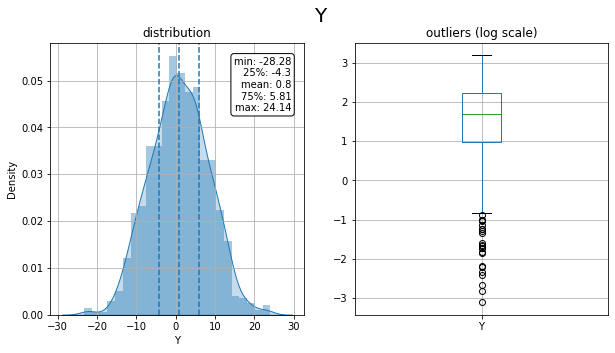

In [69]:
freqdist_plot(dtf, "Y", box_logscale=True, figsize=(10,5))

     Y        X1        X2        X3        X4        X5        X6        X7  \
Y  1.0  0.036603  0.030946  0.006431  0.015554  0.027328  0.039484  0.126267   

         X8        X9  ...       X91       X92       X93       X94       X95  \
Y  0.337639  0.395189  ...  0.140272  0.040115  0.051675  0.072289  0.093338   

        X96       X97      X98       X99      X100  
Y  0.000184  0.081742  0.07619  0.091086  0.046194  

[1 rows x 100 columns]
['X7', 'X8', 'X9', 'X10', 'X18', 'X26', 'X27', 'X29', 'X30', 'X32', 'X33', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X51', 'X70', 'X71', 'X74', 'X75', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X90', 'X91', 'X93', 'X94', 'X95', 'X97', 'X98', 'X99']
42


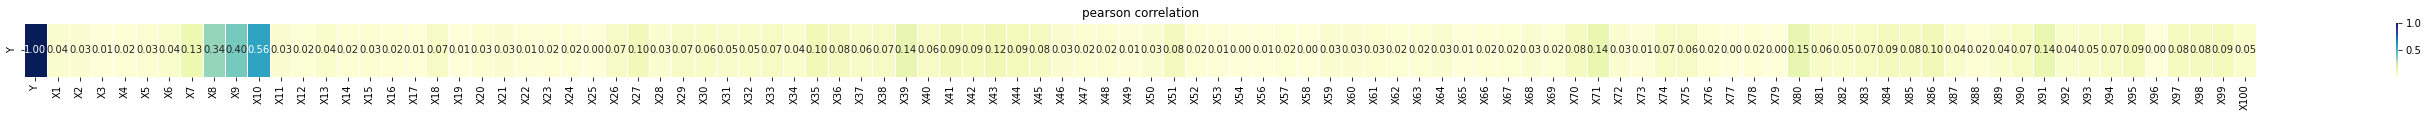

In [35]:
corr = corr_matrix(dtf, method="pearson", negative=False, lst_filters=["Y"], figsize=(50,1))
dtf_corr = dtf.copy()
for col in dtf_corr.columns:
    if dtf_corr[col].dtype == "O":
        print("--- WARNING: Factorizing", dtf_corr[col].nunique(),"labels of", col, "---")
        dtf_corr[col] = dtf_corr[col].factorize(sort=True)[0]
dtf_corr = dtf_corr.corr(method="pearson").loc[["Y"]]
dtf_corr = dtf_corr.abs()
print(dtf_corr)
cols = []
for col in dtf_corr.columns:
    if dtf_corr[col]["Y"] > 0.05:
        cols.append(col)
cols = cols[1:]
print(cols)
print(len(cols))

###### Summary

In [36]:
dtf = dtf[cols+["Y"]]
dtf.head()

,X7,X8,X9,X10,X18,X26,X27,X29,X30,X32,...,X86,X90,X91,X93,X94,X95,X97,X98,X99,Y
0,1.310004,0.215709,-1.389411,0.460228,0.126127,1.020843,-0.691022,0.340182,-1.062630,-2.814140,...,-0.760280,-0.713475,0.281741,1.053928,-1.051535,-0.056903,0.192312,-0.039506,-0.806675,-2.836799
1,-0.950866,-1.250921,-0.303370,-0.465730,-0.241237,2.102326,0.001624,0.256740,1.026534,-0.748443,...,0.005857,0.564504,2.570875,0.679621,-1.361717,0.144300,-0.298901,-1.717027,-0.518633,-6.691350
2,0.719717,0.534322,0.669822,-0.001469,-0.574339,1.133946,1.992092,-2.079040,-0.401276,0.186632,...,1.471612,1.347914,0.055120,0.092876,-0.513097,1.317656,-1.900100,1.496698,-0.108403,2.211965
3,1.462078,-1.410871,-1.152401,0.058687,1.226037,-0.561515,0.718395,0.477101,0.457317,-0.832256,...,-0.361649,1.104767,-0.036887,1.462439,-2.483321,-0.173088,0.441478,0.461693,0.791968,-3.404807
4,0.558184,-0.476010,-1.181636,0.392156,-0.229849,-0.627426,-0.949786,1.095068,-0.248308,0.434679,...,0.022329,-0.555652,-1.734769,-1.528430,0.126828,2.164732,-0.324924,-0.864985,-0.494360,-8.606178


### 2 - Preprocessing

###### To do:
- Dataset partitioning
- Resample
- Treat missings
- Encode categorical data
- Scaling
- Preprocess Test data

In [37]:
check = data_preprocessing(dtf, y="Y", task="regression")

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


###### Partitioning

In [38]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="Y", test_size=0.3, shuffle=False)

X_train shape: (700, 42) | X_test shape: (300, 42)
y_train mean: 0.56 | y_test mean: 1.34
43 features: ['X7', 'X8', 'X9', 'X10', 'X18', 'X26', 'X27', 'X29', 'X30', 'X32', 'X33', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X51', 'X70', 'X71', 'X74', 'X75', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X90', 'X91', 'X93', 'X94', 'X95', 'X97', 'X98', 'X99']


Shape: (700, 43)
-----------------
X7 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X8 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X9 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3) | Possible PK
X10 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3) | Possible PK
X18 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X26 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X27 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X29 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X30 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X32 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X33 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X35 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X36 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X37 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X38 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(3) | Possible PK
X39 --> 

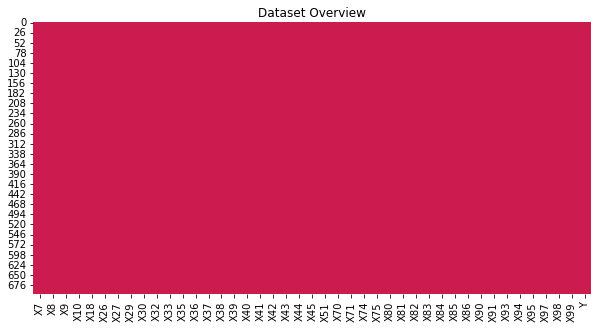

 Categerocial   Numerical   NaN 


,X7,X8,X9,X10,X18,X26,X27,X29,X30,X32,...,X86,X90,X91,X93,X94,X95,X97,X98,X99,Y
0,1.310004,0.215709,-1.389411,0.460228,0.126127,1.020843,-0.691022,0.340182,-1.062630,-2.814140,...,-0.760280,-0.713475,0.281741,1.053928,-1.051535,-0.056903,0.192312,-0.039506,-0.806675,-2.836799
1,-0.950866,-1.250921,-0.303370,-0.465730,-0.241237,2.102326,0.001624,0.256740,1.026534,-0.748443,...,0.005857,0.564504,2.570875,0.679621,-1.361717,0.144300,-0.298901,-1.717027,-0.518633,-6.691350
2,0.719717,0.534322,0.669822,-0.001469,-0.574339,1.133946,1.992092,-2.079040,-0.401276,0.186632,...,1.471612,1.347914,0.055120,0.092876,-0.513097,1.317656,-1.900100,1.496698,-0.108403,2.211965


In [39]:
dtf_overview(dtf_train)
dtf_train.head(3)

Shape: (300, 43)
-----------------
X7 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X8 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3) | Possible PK
X9 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X10 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X18 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X26 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X27 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X29 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X30 --> Type:num | Nas: 0(0%) | Min-Max: (-4)-(3) | Possible PK
X32 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X33 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X35 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X36 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3) | Possible PK
X37 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X38 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X39 --> 

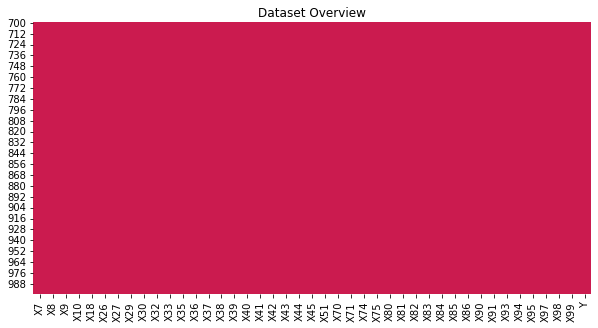

 Categerocial   Numerical   NaN 


,X7,X8,X9,X10,X18,X26,X27,X29,X30,X32,...,X86,X90,X91,X93,X94,X95,X97,X98,X99,Y
700,1.686381,-0.876513,0.948888,-0.531737,0.592267,-0.519689,-0.315400,1.453733,-1.071012,1.090348,...,0.868754,0.655341,-1.083739,0.654047,-2.634589,0.944870,-0.235319,0.253633,1.678625,0.734261
701,1.451738,-0.702726,-0.302810,1.546573,0.008068,-0.940475,1.215840,-0.436582,0.170095,-0.004437,...,0.552634,1.174861,0.582333,0.753669,-0.102041,1.086618,1.221569,-0.282038,1.841899,3.729787
702,-0.324141,-1.041824,1.325850,0.412940,-0.532125,-0.033151,0.778211,1.627934,0.776229,-0.062474,...,1.890830,0.260995,1.193986,-0.145689,0.511029,-0.835915,0.237464,1.691768,0.104437,5.443225


In [40]:
dtf_overview(dtf_test)
dtf_test.head(3)

###### Scaling

In [41]:
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))

RobustScaler()

In [42]:
dtf_train, scalerX, scalerY = scaling(dtf_train, y="Y", scalerX=scalerX, scalerY=scalerY, task="regression")

RobustScaler()

In [43]:
dtf_train.head()

,X7,X8,X9,X10,X18,X26,X27,X29,X30,X32,...,X86,X90,X91,X93,X94,X95,X97,X98,X99,Y
0,1.085142,0.222946,-0.921223,0.322026,0.081441,0.735486,-0.494822,0.229401,-0.741070,-2.091490,...,-0.572051,-0.594383,0.236888,0.718626,-0.802939,-0.041917,0.219411,-0.045856,-0.586317,-0.336589
1,-0.740262,-0.878788,-0.175316,-0.364301,-0.203948,1.521246,0.044864,0.165771,0.675263,-0.588551,...,-0.013877,0.382325,1.859122,0.443865,-1.041690,0.107612,-0.156516,-1.237914,-0.368849,-0.718770
2,0.608550,0.462288,0.493084,-0.020187,-0.462721,0.817662,1.595768,-1.615413,-0.292709,0.091782,...,1.054011,0.981053,0.076289,0.013162,-0.388497,0.979623,-1.381920,1.045782,-0.059132,0.163998
3,1.207925,-0.998943,-0.758442,0.024401,0.935914,-0.414190,0.603347,0.333810,0.289367,-0.649531,...,-0.281625,0.795225,0.011087,1.018494,-1.905001,-0.128264,0.410099,0.310300,0.620636,-0.392908
4,0.478130,-0.296674,-0.778521,0.271571,-0.195102,-0.462078,-0.696442,0.805050,-0.189006,0.272253,...,-0.001876,-0.473765,-1.192147,-1.176963,0.104061,1.609151,-0.176431,-0.632447,-0.350524,-0.908626


Shape: (700, 43)
-----------------
X7 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X8 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X9 --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(2) | Possible PK
X10 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X18 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X26 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X27 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X29 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(1) | Possible PK
X30 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X32 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X33 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X35 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X36 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X37 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(1) | Possible PK
X38 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X39 --> 

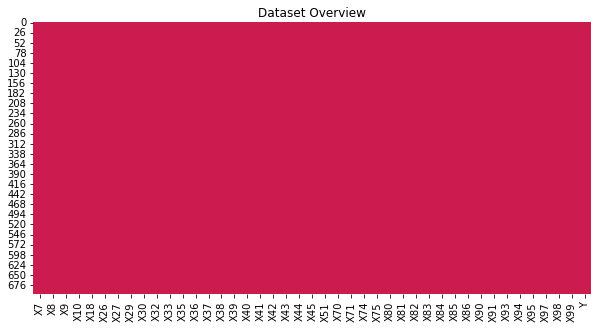

 Categerocial   Numerical   NaN 


In [44]:
dtf_overview(dtf_train)

###### Preprocess Test data

In [46]:
## scaling
dtf_test, _, _ = scaling(dtf_test, y="Y", scalerX=scalerX, scalerY=scalerY, fitted=True, task="regression")

Shape: (300, 43)
-----------------
X7 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(1) | Possible PK
X8 --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(2) | Possible PK
X9 --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(1) | Possible PK
X10 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X18 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(1) | Possible PK
X26 --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(1) | Possible PK
X27 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(1) | Possible PK
X29 --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(1) | Possible PK
X30 --> Type:num | Nas: 0(0%) | Min-Max: (-3)-(2) | Possible PK
X32 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X33 --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(2) | Possible PK
X35 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X36 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(2) | Possible PK
X37 --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(2) | Possible PK
X38 --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(1) | Possible PK
X39 --> 

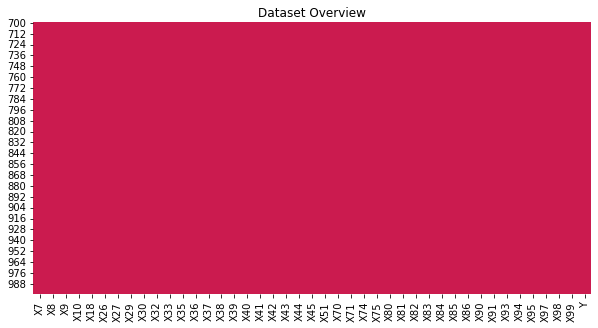

 Categerocial   Numerical   NaN 


In [47]:
dtf_overview(dtf_test)

### 3 - Baseline (xgboost)

###### Plan:
- Feature Selection: by correlation, by p-value, by importance
- Model Design
- Train / Test
- Evaluate
- Explainability
- Visualize model

###### Features Selection

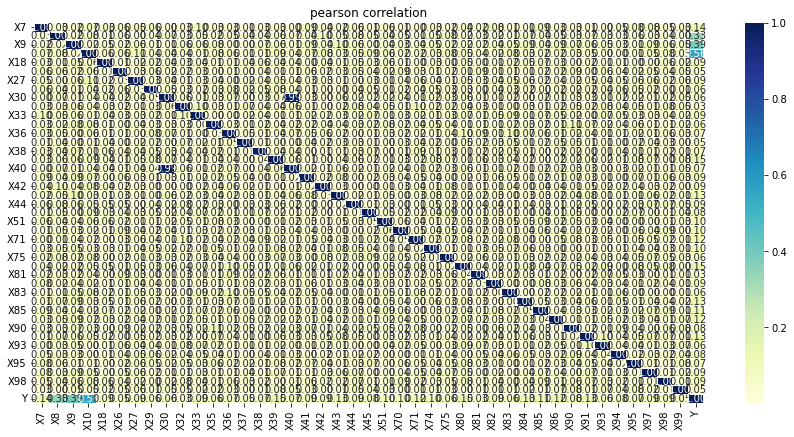

In [48]:
## correlation
corr = corr_matrix(dtf_train, method="pearson", negative=False, annotation=True, figsize=(15,7))

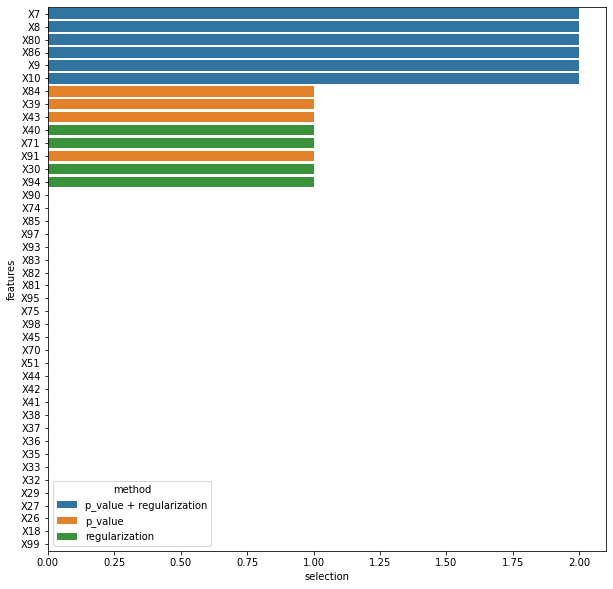

In [49]:
## p values
dic_feat_sel = features_selection(dtf_train, y="Y", task="regression", top=10, figsize=(10,10))

--- model used ---
RandomForestRegressor(random_state=0)


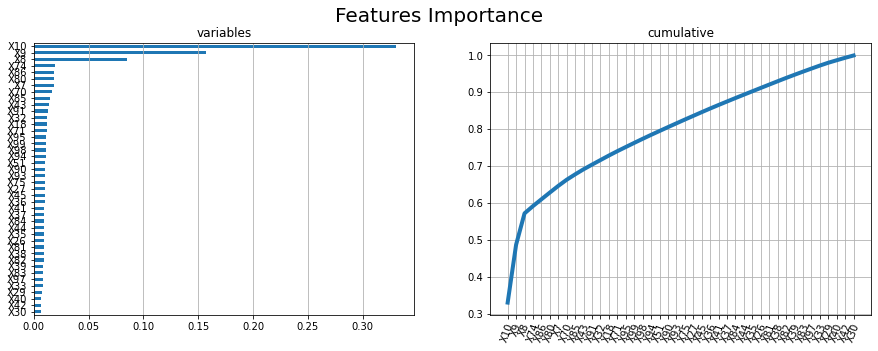

In [50]:
## importance
model = ensemble.RandomForestRegressor(n_estimators=100, criterion="mse", random_state=0)

feat_imp = features_importance(X=dtf_train.drop("Y",axis=1).values, y=dtf_train["Y"].values, 
                               X_names=dtf_train.drop("Y",axis=1).columns.tolist(), 
                               model=model, task="regression", figsize=(15,5))

In [51]:
## feature selection
X_names = ['X8','X9','X10']

###### Model Design

In [52]:
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values

In [53]:
model = ensemble.GradientBoostingRegressor()

In [54]:
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
             'max_depth':[2,3,4,5,6,7],                             #maximum depth of the tree
             'min_samples_split':[2,4,6,8,10,20,40,60,100],         #sets the minimum number of samples to split
             'min_samples_leaf':[1,3,5,7,9],                        #the minimum number of samples to form a leaf
             'max_features':[2,3,4,5,6,7],                          #square root of features is usually a good starting point
             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}            #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

--- RandomSearch ---
Best Model parameters: {'subsample': 0.85, 'n_estimators': 500, 'min_samples_split': 40, 'min_samples_leaf': 7, 'max_features': 2, 'max_depth': 5, 'learning_rate': 0.01}
Best Model r2: 0.51

--- Kfold Validation ---
r2 mean - base model: 0.48  --> best model: 1


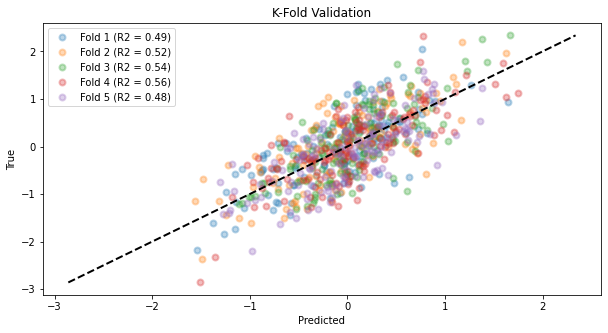

In [55]:
## param tuning
model = tune_regr_model(X_train, y_train, model, param_dic, scoring="r2", 
                        searchtype="RandomSearch", n_iter=100, cv=5, figsize=(10,5))

###### Train / Test

In [60]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [64]:
model, predicted = fit_ml_regr(model, X_train, y_train, X_test, scalerY)

###### Evaluate

R2 (explained variance): 0.58
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 3.85
Mean Absolute Error (Σ|y-pred|/n): 4
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5
Max Error: -14


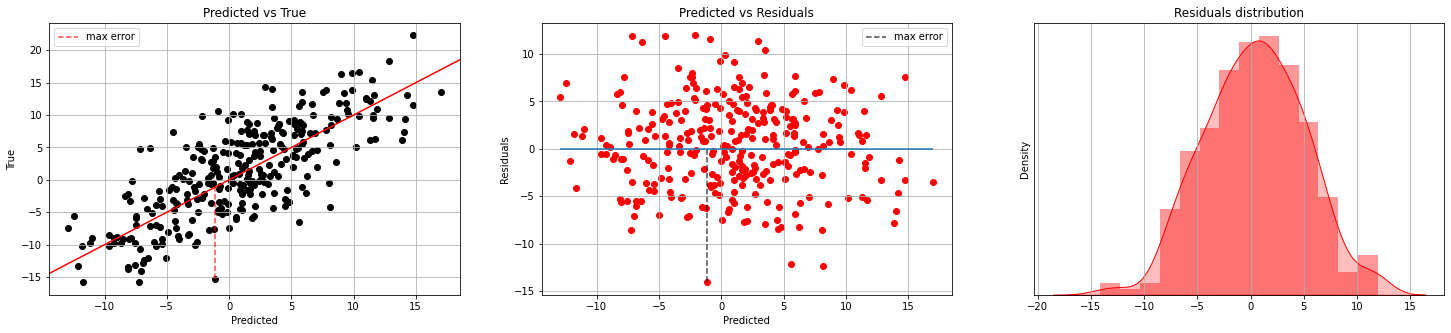

In [ ]:
evaluate_regr_model(y_test, predicted, figsize=(25,5))

In [ ]:
dtf_ans = pd.read_csv("test-x.csv")
X_ans = dtf_ans[X_names].values
model, predicted_ans = fit_ml_regr(model, X_train, y_train, X_ans, scalerY)
res = pd.DataFrame(predicted_ans)
res.describe()
res.to_csv("ans.csv",header=["Y"], index=False)

In [ ]:
## save model
# from sklearn.externals import joblib
# joblib.dump(model, 'model.pkl')

## load model
# from sklearn.externals import joblib
# model = joblib.load('model.pkl')

###### Explainability

In [ ]:
i = 1
print("True:", "{:,.0f}".format(y_test[i]), "--> Pred:", "{:,.0f}".format(predicted[i]))

explainer_shap(model, X_names, X_instance=X_test[i], X_train=None, task="regression", top=10)

###### Visualize model

In [ ]:
model2d = linear_model.LinearRegression()
# model2d.set_params(**model.get_params())

In [ ]:
## matplotlib notebook
plot3d_regr_model(X_train, y_train, X_test, y_test, scalerY, model2d, rotate=(30,0), figsize=(7,5))